In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Problem 1

In [2]:
def getExpectedValue(environments, state, action, shuttle_capacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        # subtract the capacity of the shuttle if action indicator is 1
        s_prime = min(max(state + env - action * shuttle_capacity, 0), 200)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(environments) * V_prime[s_prime]
    # expected total value given the state and the action
    return reward + discount * value

In [3]:
def getReward(c_f, c_h, a, s, K):
    return a * c_f + max(s - a * K, 0) * c_h

## A)

In [4]:
def enumeration(T, S, A, E, K, c_f, c_h, d, V_t1, V_t):
    for t in range(T, -1, -1):
        for s in S:
            expectedValues = []
            for a in A:
                # calculate the reward based on the action and state
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_t1, reward, d))
            V_t[s] = max(expectedValues)
        V_t1 = V_t.copy()
    plt.plot(V_t1)
    return plt.show()

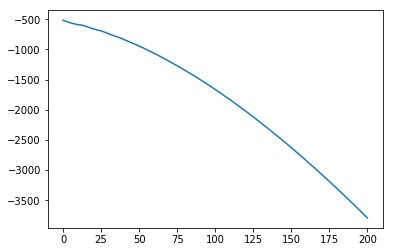

0.9427177906036377

In [5]:
T = 500
S = list(range(0, 201))
A = [0, 1]
E = list(range(1, 6))
K = 15
c_f = -100
c_h = -2
d = 0.95
V_t1 = [0] * 201
V_t = [0] * 201
start = time.time()
enumeration(T, S, A, E, K, c_f, c_h, d, V_t1, V_t)
end = time.time()
end - start

## B)

In [6]:
def valueIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k):
    while delta > theta:
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_k, reward, d))
            V_k1[s] = max(expectedValues)
        delta = max(np.abs(np.array(V_k1) - np.array(V_k)))
        # update V_k to be the expected total values for V_k1 as we iterate forward through k
        V_k = V_k1.copy()
    plt.plot(V_k)
    return plt.show()

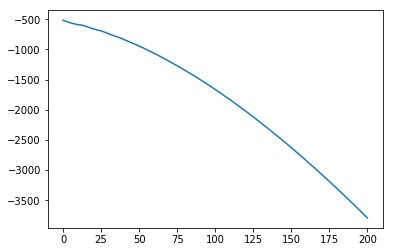

0.6346189975738525

In [7]:
theta = 10e-6
delta = 2
V_k1 = [0] * 201
V_k = [0] * 201
start = time.time()
valueIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k)
end = time.time()
end - start

## C)

In [14]:
def policyIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy):
    changing = True
    while changing:
        # Policy evaluation
        while delta > theta:
            for s in S:
                # Get the action based on the policy
                a = oldPolicy[s]
                reward = getReward(c_f, c_h, a, s, K)
                V_k1[s] = getExpectedValue(E, s, a, K, V_k, reward, d)
            delta = max(np.abs(np.array(V_k1) - np.array(V_k)))
            V_k = V_k1.copy()
        # Policy improvement
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_k, reward, d))
            bestAction = np.argmax(expectedValues)
            newPolicy[s] = bestAction
        if newPolicy != oldPolicy:
            oldPolicy = newPolicy.copy()
            delta = 2
        else:
            changing = False
    plt.plot(newPolicy)
    plt.show()
    return newPolicy

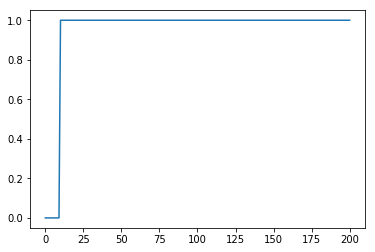

2.6181528568267822

In [15]:
V_k1 = [0] * 201
V_k = [0] * 201
oldPolicy = [random.randint(0,1)] * 201
newPolicy = [random.randint(0,1)] * 201
start = time.time()
policy = policyIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy)
end = time.time()
end - start

In [16]:
policy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

# Problem 2

In [17]:
def createStates(stationCapacity, maxArrivals):
    S = []
    V_t1 = {}
    V_t = {}
    newPolicy = {}
    oldPolicy = {}
    for state1 in range(0, stationCapacity + 1):
        for state2 in range(0, stationCapacity + 1):
            for state3 in range(0, stationCapacity + 1):
                for state4 in range(0, stationCapacity + 1):
                    for state5 in range(0, stationCapacity + 1):
                        S.append([state1, state2, state3, state4, state5])
                        V_t1[(state1, state2, state3, state4, state5)] = 0
                        V_t[(state1, state2, state3, state4, state5)] = 0
                        newPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        oldPolicy[(state1, state2, state3, state4, state5)] = random.randint(0,1)
                        
    
    E = []
    for env1 in range(1, maxArrivals + 1):
        for env2 in range(1, maxArrivals + 1):
            for env3 in range(1, maxArrivals + 1):
                for env4 in range(1, maxArrivals + 1):
                    for env5 in range(1, maxArrivals + 1):
                        E.append([env1, env2, env3, env4, env5])
    return S, V_t1, V_t, newPolicy, oldPolicy, E

In [18]:
def getReward(c_f, c_h, a, s, K, stationCapacity):
    return a * c_f + sum(getNextState(a, s, K, stationCapacity) * c_h)

In [19]:
def getNextState(a, s, K, stationCapacity, env=np.array([0,0,0,0,0])):
    s=np.clip(np.add(s, env), 0, stationCapacity)
    s_prime = s.copy()
    if a == 1:
        for i in range(len(s_prime)-1, -1, -1):
            s_prime[i] = max(s_prime[i] - K, 0)
            K -= np.abs(s[i] - s_prime[i])
    return s_prime

In [20]:
def getExpectedValue(environments, state, S, action, shuttleCapacity, stationCapacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        s_prime = getNextState(action, state, shuttleCapacity, stationCapacity, env)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(E) * V_prime[tuple(s_prime)]
    # expected total value given the state and the action
    return reward + discount * value

## A)

In [21]:
def enumeration(T, S, A, E, K, stationCapacity, c_f, c_h, d, V_t1, V_t):
    for t in range(T, -1, -1):
        for s in S:
            expectedValues = []
            for a in A:
                # calculate the reward based on the action and state
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_t1, reward, d))
            V_t[tuple(s)] = max(expectedValues)
        V_t1 = V_t.copy()
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(V_t1[(0,0,0,0,i)])
    plt.plot(plot_values)
    return plt.show()

In [22]:
stationCapacity = 2
maxArrivals = 5
S, V_t1, V_t, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)

In [ ]:
start = time.time()
T = 500
A = [0, 1]
K = 30
c_f = -100
c_h = np.array([-1, -1.5, -2, -2.5, -3])
d = 0.95
V_t1 = enumeration(T, S, A, E, K, stationCapacity, c_f, c_h, d, V_t1, V_t)
end = time.time()
end - start

## B)

In [ ]:
def valueIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k):
    i = 0
    while delta > theta:
        delta = 0
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d))
            V_k1[tuple(s)] = max(expectedValues)
            if np.abs(V_k1[tuple(s)] - V_k[tuple(s)]) > delta:
                delta = np.abs(V_k1[tuple(s)] - V_k[tuple(s)])
        # update V_k to be the expected total values for V_k1 as we iterate forward through k
        print(i, delta)
        V_k = V_k1.copy()
        i += 1
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(V_t1[(0,0,0,0,i)])
    plt.plot(plot_values)
    return V_k

In [ ]:
start = time.time()
theta = 10e-6
delta = 2
S, V_k1, V_k, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)
V_k = valueIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k)
end = time.time()
end - start

## C)

In [ ]:
def policyIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy):
    changing = True
    while changing:
        i = 0
        # Policy evaluation
        while delta > theta:
            delta = 0
            for s in S:
                # Get the action based on the policy
                a = oldPolicy[tuple(s)]
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                V_k1[tuple(s)] = getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d)
                if np.abs(V_k1[tuple(s)] - V_k[tuple(s)]) > delta:
                    delta = np.abs(V_k1[tuple(s)] - V_k[tuple(s)])
            print(i, delta)
            V_k = V_k1.copy()
            i += 1
        # Policy improvement
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, a, K, stationCapacity, V_k, reward, d))
            bestAction = np.argmax(expectedValues)
            newPolicy[tuple(s)] = bestAction
        if newPolicy != oldPolicy:
            oldPolicy = newPolicy.copy()
            delta = 2
        else:
            changing = False
    return newPolicy

In [ ]:
start = time.time()
theta = 10e-6
delta = 2
A = [0,1]
K = 30
c_f = -100
c_h = np.array([-1, -1.5, -2, -2.5, -3])
d = 0.95
S, V_k1, V_k, newPolicy, oldPolicy, E = createStates(stationCapacity, maxArrivals)
policy = policyIteration(theta, delta, S, A, E, K, stationCapacity, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy)
end = time.time()
end - start